# Multiple Regression Analysis with Qualitative Information

In [1]:
import pandas as pd
import numpy as np
import wooldridge
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
def report(model, option=3, return_info=False):
    summary_table = model.summary2().tables[1]

    # Select columns based on the option
    if option == 1:
        summary = summary_table[["Coef.", "Std.Err."]]
    elif option == 2:
        summary = summary_table[["Coef.", "Std.Err.", "t"]]
    elif option == 3:
        summary = summary_table[["Coef.", "Std.Err.", "t", "P>|t|"]]
    elif option == 4:
        summary = summary_table[["Coef.", "P>|t|"]]
    else:
        summary = summary_table.copy()  # All columns

    # Round the values for clean display
    summary = summary.round(3)

    # Model info
    n = int(model.nobs)
    r2 = round(model.rsquared, 3)
    mse = round(np.sqrt(model.mse_resid), 3)
    model_info = f"R² = {r2}, n = {n}, SE = {mse}"

    if return_info:
        return summary, model_info
    else:
        print("Model info:", model_info)
        return summary

In [3]:
wooldridge.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

## Examples

In [ ]:
wage1 = wooldridge.data("wage1")
gpa1 = wooldridge.data("gpa1")
jtrain = wooldridge.data("jtrain")
hprice1 = wooldridge.data("hprice1")
beauty = wooldridge.data("beauty")
lawsch85 = wooldridge.data("lawsch85")
mlb1 = wooldridge.data("mlb1")
crime1 = wooldridge.data("crime1")

### 7.1 Hourly Wage Equation

In [ ]:
wooldridge.data("wage1", description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [ ]:
model01 = smf.ols("wage ~ female + educ + exper + tenure", data=wage1).fit()
report(model01)

Model info: R² = 0.364, n = 526, SE = 2.958


,Coef.,Std.Err.,t,P>|t|
Intercept,-1.568,0.725,-2.164,0.031
female,-1.811,0.265,-6.838,0.000
educ,0.572,0.049,11.584,0.000
exper,0.025,0.012,2.195,0.029
tenure,0.141,0.021,6.663,0.000


Men [Female = 0 ] has a negative intercept of -1.57 which isn't useful as no one has control variables with values of zero  
On average, females with same education, experience and tenure as men earn less than men by $1.81 per hour 

In [ ]:
model012 = smf.ols("wage ~ female", data=wage1).fit()
report(model012)

Model info: R² = 0.116, n = 526, SE = 3.476


,Coef.,Std.Err.,t,P>|t|
Intercept,7.099,0.210,33.806,0.0
female,-2.512,0.303,-8.279,0.0


In this simple model, men earn $7.1 per hour on average.
Females earn on average $2.51 less than men, they earn $7.1- 2.51 = $4.59$ per hour 

The difference between the two groups is statistically significant $t=-8.3$

Note: simple regression provides an easy way to do comparison of means test but assumes homoscedasticity 

### 7.2 Effects of Computer Ownership on College GPA

In [ ]:
wooldridge.data("gpa1", description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

In [ ]:
model02 = smf.ols(formula="colGPA ~ PC + hsGPA + ACT", data=gpa1).fit()
report(model02)

Model info: R² = 0.219, n = 141, SE = 0.333


,Coef.,Std.Err.,t,P>|t|
Intercept,1.264,0.333,3.793,0.000
PC,0.157,0.057,2.746,0.007
hsGPA,0.447,0.094,4.776,0.000
ACT,0.009,0.011,0.822,0.413


A student who has pc is expected to score on average 0.16 higher than other students with same ACT and high school GPA scores 

hsGPA is statically significant, so dropping it can change the coefficient of PC

### 7.3 Effects of Training Grants on Hours of Training

In [ ]:
wooldridge.data("jtrain", description=True)

name of dataset: jtrain
no of variables: 30
no of observations: 471

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| year     | 1987, 1988, or 1989             |
| fcode    | firm code number                |
| employ   | # employees at plant            |
| sales    | annual sales, $                 |
| avgsal   | average employee salary         |
| scrap    | scrap rate (per 100 items)      |
| rework   | rework rate (per 100 items)     |
| tothrs   | total hours training            |
| union    | =1 if unionized                 |
| grant    | = 1 if received grant           |
| d89      | = 1 if year = 1989              |
| d88      | = 1 if year = 1988              |
| totrain  | total employees trained         |
| hrsemp   | tothrs/totrain                  |
| lscrap   | log(scrap)                      |
| lemploy  | log(employ)                     |
| lsales   | log(sales)               

In [ ]:
df = jtrain.copy()
df = df[df["year"] == 1988]
model03 = smf.ols("hrsemp ~ grant + lsales + lemploy", data=df).fit()
report(model03)

Model info: R² = 0.237, n = 105, SE = 24.38


,Coef.,Std.Err.,t,P>|t|
Intercept,46.665,43.412,1.075,0.285
grant,26.254,5.592,4.695,0.000
lsales,-0.985,3.540,-0.278,0.781
lemploy,-6.070,3.883,-1.563,0.121


We used hrsemp in level form because it is zero in many rows  
grant is statistically significant with a large coefficient

### 7.4 Housing Price Regression

In [ ]:
wooldridge.data("hprice1", description=True)

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.


In [ ]:
model04 = smf.ols("lprice ~ llotsize + lsqrft + bdrms + colonial", data=hprice1).fit()
report(model04)

Model info: R² = 0.649, n = 88, SE = 0.184


,Coef.,Std.Err.,t,P>|t|
Intercept,-1.350,0.651,-2.073,0.041
llotsize,0.168,0.038,4.395,0.000
lsqrft,0.707,0.093,7.620,0.000
bdrms,0.027,0.029,0.934,0.353
colonial,0.054,0.045,1.202,0.233


Controlling for lotsize, bdrms, sqrft, colonial style house is priced $5.4\%$ more than non colonial style house 

### 7.5 Log Hourly Wage Equation

In [ ]:
model05 = smf.ols(
    "lwage ~ female + educ + exper + expersq + tenure + tenursq", data=wage1
).fit()
report(model05)

Model info: R² = 0.441, n = 526, SE = 0.4


,Coef.,Std.Err.,t,P>|t|
Intercept,0.417,0.099,4.212,0.000
female,-0.297,0.036,-8.281,0.000
educ,0.080,0.007,11.868,0.000
exper,0.029,0.005,5.916,0.000
expersq,-0.001,0.000,-5.431,0.000
tenure,0.032,0.007,4.633,0.000
tenursq,-0.001,0.000,-2.493,0.013


Controlling for educ, exper, tenure, women earn less than men by around 29.7%  
A better approximation is $$\exp(\hat \beta) - 1 $$  
$\exp(-0.297) - 1 \approx -0.257$, women earn less than comparable men by 25.7%

### 7.6 Log Hourly Wage Equation

In [ ]:
wooldridge.data("wage1", description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [ ]:
df = wage1.copy()
df["marrmale"] = ((df["female"] == 0) & (df["married"] == 1)).astype(int)
df["marrfem"] = ((df["female"] == 1) & (df["married"] == 1)).astype(int)
df["singfem"] = ((df["female"] == 1) & (df["married"] == 0)).astype(int)

In [ ]:
model06 = smf.ols(
    "lwage ~ marrmale + marrfem + singfem + educ  + exper + expersq + tenure + tenursq",
    data=df,
).fit()
report(model06)

Model info: R² = 0.461, n = 526, SE = 0.393


,Coef.,Std.Err.,t,P>|t|
Intercept,0.321,0.100,3.213,0.001
marrmale,0.213,0.055,3.842,0.000
marrfem,-0.198,0.058,-3.428,0.001
singfem,-0.110,0.056,-1.980,0.048
educ,0.079,0.007,11.787,0.000
exper,0.027,0.005,5.112,0.000
expersq,-0.001,0.000,-4.847,0.000
tenure,0.029,0.007,4.302,0.000
tenursq,-0.001,0.000,-2.306,0.022


All the coefficients are statistically significant. Base group for the dummy variables is single males.  
Married men are expected to earn more than single men by 21.3% with the same education, experience and tenure, while married women earns 19.8% less

### 7.7 Effects of Physical Attractiveness on Wage

In [ ]:
wooldridge.data("beauty", description=True)

name of dataset: beauty
no of variables: 17
no of observations: 1260

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| wage     | hourly wage                   |
| lwage    | log(wage)                     |
| belavg   | =1 if looks <= 2              |
| abvavg   | =1 if looks >=4               |
| exper    | years of workforce experience |
| looks    | from 1 to 5                   |
| union    | =1 if union member            |
| goodhlth | =1 if good health             |
| black    | =1 if black                   |
| female   | =1 if female                  |
| married  | =1 if married                 |
| south    | =1 if live in south           |
| bigcity  | =1 if live in big city        |
| smllcity | =1 if live in small city      |
| service  | =1 if service industry        |
| expersq  | exper^2                       |
| educ     | years of schooling            |
+----------+------------------

### 7.8 Effects of Law School Rankings on Starting Salaries

In [ ]:
wooldridge.data("lawsch85", description=True)

name of dataset: lawsch85
no of variables: 21
no of observations: 156

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| rank     | law school ranking         |
| salary   | median starting salary     |
| cost     | law school cost            |
| LSAT     | median LSAT score          |
| GPA      | median college GPA         |
| libvol   | no. volumes in lib., 1000s |
| faculty  | no. of faculty             |
| age      | age of law sch., years     |
| clsize   | size of entering class     |
| north    | =1 if law sch in north     |
| south    | =1 if law sch in south     |
| east     | =1 if law sch in east      |
| west     | =1 if law sch in west      |
| lsalary  | log(salary)                |
| studfac  | student-faculty ratio      |
| top10    | =1 if ranked in top 10     |
| r11_25   | =1 if ranked 11-25         |
| r26_40   | =1 if ranked 26-40         |
| r41_60   | =1 if ranked 41-60         |
| lli

In [ ]:
df = lawsch85.copy()
df["top10"] = (df["rank"] <= 10).astype(int)
df["r11_25"] = ((df["rank"] > 10) & (df["rank"] <= 25)).astype(int)
df["r26_40"] = ((df["rank"] > 25) & (df["rank"] <= 40)).astype(int)
df["r41_60"] = ((df["rank"] > 40) & (df["rank"] <= 60)).astype(int)
df["r61_100"] = ((df["rank"] > 60) & (df["rank"] <= 100)).astype(int)

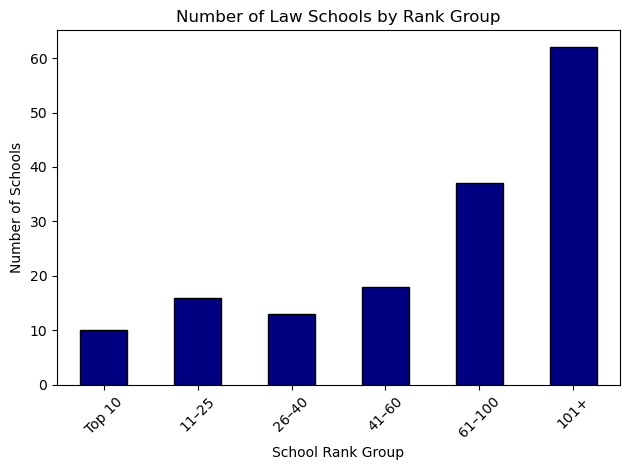

In [ ]:
bins = [0, 10, 25, 40, 60, 100, lawsch85["rank"].max()]
labels = ["Top 10", "11–25", "26–40", "41–60", "61–100", "101+"]

lawsch85["rank_group"] = pd.cut(lawsch85["rank"], bins=bins, labels=labels, right=True)

rank_group_counts = lawsch85["rank_group"].value_counts().sort_index()

rank_group_counts.plot(kind="bar", color="navy", edgecolor="black")
plt.xlabel("School Rank Group")
plt.ylabel("Number of Schools")
plt.title("Number of Law Schools by Rank Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
model08 = smf.ols(
    "lsalary ~ top10 + r11_25 + r26_40 + r41_60 + r61_100 + LSAT + GPA + llibvol + lcost",
    data=df,
).fit()
report(model08)

Model info: R² = 0.911, n = 136, SE = 0.086


,Coef.,Std.Err.,t,P>|t|
Intercept,9.165,0.411,22.277,0.000
top10,0.700,0.053,13.078,0.000
r11_25,0.594,0.039,15.049,0.000
r26_40,0.375,0.034,11.005,0.000
r41_60,0.263,0.028,9.399,0.000
r61_100,0.132,0.021,6.254,0.000
LSAT,0.006,0.003,1.858,0.066
GPA,0.014,0.074,0.185,0.854
llibvol,0.036,0.026,1.398,0.165
lcost,0.001,0.025,0.033,0.973


Schools below 100 is left as the base group.  
All the ranks are statistically significant controlling for $LSAT, GPA, libvol, cost$.  
The difference between $r61_100, r101+$ is relatively small, so using the approximation: Schools ranked 61 to 100 earn a median salary 13.2% higher than schools ranked 101+  
Using exact formula with top10: $\exp{0.7}-1 = 1.014$: Top 10 schools earn a median salary 100% higher than schools below 100.  

Note: Rank of a school depends on other schools, so random sample assumption is violated. As long as the error term is uncorrelated with the explanatory variables, there is no problem caused.

### 7.9 Effects of Computer Usage on Wages

I will simulate the data because its not available

In [ ]:
np.random.seed(42)

# Sample size
n = 13379

# Binary indicators
compwork = np.random.binomial(1, 0.3, n)
comphome = np.random.binomial(1, 0.2, n)
interaction = compwork * comphome

# Target betas
beta0 = 1
beta1 = 0.177
beta2 = 0.070
beta3 = 0.017

# To hit target SEs approximately, set noise level accordingly
# After experimentation, this works well
sigma = 0.05  # Adjust noise scale

# Generate lwage
error = np.random.normal(0, sigma, n)
lwage = beta0 + beta1 * compwork + beta2 * comphome + beta3 * interaction + error

# Create DataFrame
df = pd.DataFrame({"lwage": lwage, "compwork": compwork, "comphome": comphome})

# Interaction term
df["interaction"] = df["compwork"] * df["comphome"]

In [ ]:
model09 = smf.ols("lwage ~ compwork + comphome + interaction", data=df).fit()
report(model09)

Model info: R² = 0.755, n = 13379, SE = 0.05


,Coef.,Std.Err.,t,P>|t|
Intercept,0.999,0.001,1738.802,0.0
compwork,0.177,0.001,166.199,0.0
comphome,0.071,0.001,55.295,0.0
interaction,0.016,0.002,6.835,0.0


Base group is people who don't use computer at home nor work.  
Using computer at work only results in more wage than base group by 17.7%.  
Using computer at home only results in more wage than base group by 7.1%.  
Using computer at both places results in more wage than base group by $$(0.177 + 0.071 + 0.016)* 100 = 26.4\% $$ or more accurately 30.2%


In [ ]:
(0.177 + 0.071 + 0.016) * 100, np.exp(0.177 + 0.071 + 0.016) - 1

(26.400000000000002, np.float64(0.30212819630089416))

### 7.10 Log Hourly Wage Equation

female*educ results in female, educ, interaction  
female:educ results in interaction

In [ ]:
model010 = smf.ols(
    "lwage ~ female*educ  + exper + expersq + tenure + tenursq ", data=wage1
).fit()
report(model010)

Model info: R² = 0.441, n = 526, SE = 0.4


,Coef.,Std.Err.,t,P>|t|
Intercept,0.389,0.119,3.276,0.001
female,-0.227,0.168,-1.354,0.176
educ,0.082,0.008,9.725,0.000
female:educ,-0.006,0.013,-0.426,0.670
exper,0.029,0.005,5.886,0.000
expersq,-0.001,0.000,-5.398,0.000
tenure,0.032,0.007,4.647,0.000
tenursq,-0.001,0.000,-2.509,0.012


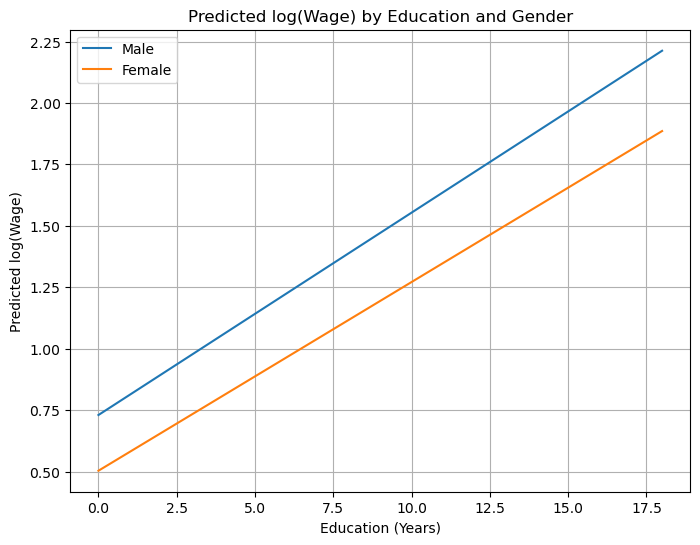

In [ ]:
# Generate prediction data
educ_range = np.linspace(wage1["educ"].min(), wage1["educ"].max(), 100)

# Create a DataFrame with two groups: male (female=0) and female (female=1)
pred_data = pd.DataFrame(
    {
        "educ": np.tile(educ_range, 2),
        "female": np.repeat([0, 1], len(educ_range)),
    }
)

# Add mean values for other covariates
for var in ["exper", "expersq", "tenure", "tenursq"]:
    pred_data[var] = wage1[var].mean()

# Compute interaction term
pred_data["female:educ"] = pred_data["female"] * pred_data["educ"]

# Predict log wages
pred_data["lwage_pred"] = model010.predict(pred_data)

# Plot
plt.figure(figsize=(8, 6))
for gender, label in zip([0, 1], ["Male", "Female"]):
    subset = pred_data[pred_data["female"] == gender]
    plt.plot(subset["educ"], subset["lwage_pred"], label=label)

plt.xlabel("Education (Years)")
plt.ylabel("Predicted log(Wage)")
plt.title("Predicted log(Wage) by Education and Gender")
plt.legend()
plt.grid(True)
plt.show()

Return on education for men is 8.2%  
Return on education for women is $0.082 - 0.0056 = 7.6\%$  
The difference on education between men and women $8.2\% - 7.6\% $ is not statistically significant  
female is no longer statistically significant, due to the multicollineairty [strong correlation between female and interaction term, standard error increased]

female coefficient measures salary difference between men and women controlling for education = 0 which is not common.
A more useful value for education is the mean in the sample 12.5 [recall chapter 6] 

### 7.11 Effects of Race on Baseball Player Salaries

In [ ]:
wooldridge.data("mlb1", description=True)

name of dataset: mlb1
no of variables: 47
no of observations: 353

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| salary   | 1993 season salary         |
| teamsal  | team payroll               |
| nl       | =1 if national league      |
| years    | years in major leagues     |
| games    | career games played        |
| atbats   | career at bats             |
| runs     | career runs scored         |
| hits     | career hits                |
| doubles  | career doubles             |
| triples  | career triples             |
| hruns    | career home runs           |
| rbis     | career runs batted in      |
| bavg     | career batting average     |
| bb       | career walks               |
| so       | career strike outs         |
| sbases   | career stolen bases        |
| fldperc  | career fielding perc       |
| frstbase | = 1 if first base          |
| scndbase | =1 if second base          |
| shrtsto

In [ ]:
df = mlb1.copy()
df = df[(df["percblck"] != 0)]

In [ ]:
model011 = smf.ols(
    "lsalary ~ years + gamesyr + bavg + hrunsyr + rbisyr + runsyr + fldperc + allstar + black + hispan + black:percblck + hispan:perchisp",
    data=df,
).fit()
report(model011)

Model info: R² = 0.638, n = 330, SE = 0.713


,Coef.,Std.Err.,t,P>|t|
Intercept,10.344,2.183,4.739,0.000
years,0.067,0.013,5.224,0.000
gamesyr,0.009,0.003,2.624,0.009
bavg,0.001,0.002,0.625,0.533
hrunsyr,0.015,0.016,0.889,0.375
rbisyr,0.004,0.008,0.593,0.553
runsyr,0.007,0.005,1.577,0.116
fldperc,0.001,0.002,0.513,0.609
allstar,0.008,0.003,2.621,0.009
black,-0.198,0.125,-1.578,0.116


The base group is white players

In [ ]:
model011.f_test("black=0, hispan=0, black:percblck=0, hispan:perchisp=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.647888304563977, p=0.03347614735675824, df_denom=317, df_num=4>

The race variables are statistically significant

black coefficient: if a black player plays in a city with no blacks [perclck = 0], he earns 19.8% less than white players.  

black:percblck: if percentage of black increase by 10%, holding percentage of hispanic fixed [white percentage decreases by 10% as base group], wage increases by 1.2% and the black player earns [-0.198 + (0.0125*10)*100 =] 7.3% less than white players  

To find percentage of hispanic that makes hispanic players earn as white people, solve for [-0.190 + 0.0201 perchisp = 0] to get perchisp = 9.45  

Note: these findings can't prove discrimination, good black players prefer staying in cities with big black percentage.

### 7.12 A Linear Probability Model of Arrests

In [ ]:
wooldridge.data("crime1", description=True)

name of dataset: crime1
no of variables: 16
no of observations: 2725

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| narr86   | # times arrested, 1986          |
| nfarr86  | # felony arrests, 1986          |
| nparr86  | # property crme arr., 1986      |
| pcnv     | proportion of prior convictions |
| avgsen   | avg sentence length, mos.       |
| tottime  | time in prison since 18 (mos.)  |
| ptime86  | mos. in prison during 1986      |
| qemp86   | # quarters employed, 1986       |
| inc86    | legal income, 1986, $100s       |
| durat    | recent unemp duration           |
| black    | =1 if black                     |
| hispan   | =1 if Hispanic                  |
| born60   | =1 if born in 1960              |
| pcnvsq   | pcnv^2                          |
| pt86sq   | ptime86^2                       |
| inc86sq  | inc86^2                         |
+----------+-------------------------

In [ ]:
df = crime1.copy()
df["arr86"] = (df["narr86"] > 0).astype(int)

In [ ]:
model012 = smf.ols("arr86 ~ pcnv + avgsen + tottime + ptime86 + qemp86", data=df).fit()
report(model012)

Model info: R² = 0.047, n = 2725, SE = 0.437


,Coef.,Std.Err.,t,P>|t|
Intercept,0.441,0.017,25.568,0.000
pcnv,-0.162,0.021,-7.649,0.000
avgsen,0.006,0.006,0.947,0.344
tottime,-0.002,0.005,-0.454,0.650
ptime86,-0.022,0.005,-4.739,0.000
qemp86,-0.043,0.005,-7.925,0.000


In [ ]:
model012.f_test("avgsen = 0, tottime=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.059700444036282, p=0.346702695391494, df_denom=2.72e+03, df_num=2>

intercept: probability of someone being arrested with no convictions is 0.441 

avgsen, tottime: insignificant individually and jointly  

ptime86: if a man is in prison for 12 months, probability of arrest is [0.441 - 0.22*12] = 0.177, which should be zero cuz he can't be arrested while already in prison    


qemp86: if a man is employed for 12 months, he is  [-0.043*4 = 0.172] less likely to be arrested than a man who is no employed

### 7.13 Evaluating a Job Training Program using Unrestricted Regression Adjustment

## 🚧Computer Exercises